<h1 style="text-align:center;">Etape 2: Data  Processing and Cleaning </h1>

# 1. Importation des packages

In [182]:
import pandas as pd  # Importe la bibliothèque pandas pour la manipulation de données sous forme de dataframes.
import numpy as np   # Importe la bibliothèque numpy pour la manipulation de tableaux (arrays).

import matplotlib.pyplot as plt  # Importe la bibliothèque matplotlib pour la visualisation de données.
import seaborn as sns  # Importe la bibliothèque seaborn pour la visualisation de données basée sur matplotlib.

# 2. charger des données

In [183]:
data=pd.read_csv('Car.csv') # lire

# 3. Data Processing and Cleaning

In [184]:
# Verifier duplication
data.drop_duplicates()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013.0,260000.0,50000.0,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014.0,475000.0,80000.0,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013.0,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,"Hyundai Verna CRDi SX,2007,135000,119000,Diese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
data.drop(['torque','seller_type'],axis=1,inplace=True)

In [186]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
data['name'] = data['name'].str.split(" ", expand=True)[0]
# extrait la première partie de chaque valeur dans la colonne 'name' jusqu'à un espace.


In [188]:
def extract_column(data, col):
    data[col] = data[col].str.split(" ", expand=True)[0]

def convert_to_float(data, col):
    data[col] = pd.to_numeric(data[col])

def fill_missing_values(data, col):
    data[col].fillna(data[col].astype("float64").mean(), inplace=True)

In [189]:
extract_column(data,'name')
extract_column(data,'mileage')
extract_column(data,'engine')
extract_column(data,'max_power')

In [190]:
convert_to_float(data,'mileage')
convert_to_float(data,'engine')
convert_to_float(data,'max_power')

In [191]:
fill_missing_values(data,'mileage')
fill_missing_values(data,'engine')
fill_missing_values(data,'seats')
fill_missing_values(data,'max_power')

In [192]:
data.isna().sum()

name               0
year             341
selling_price    341
km_driven        341
fuel             341
transmission     341
owner            341
mileage            0
engine             0
max_power          0
seats              0
dtype: int64

In [193]:
data['year'].fillna(data['year'].mean(), inplace=True)
data['selling_price'].fillna(data['selling_price'].mean(), inplace=True)
data['km_driven'].fillna(data['km_driven'].mean(), inplace=True)


In [194]:
data.dropna(subset=['fuel', 'transmission', 'owner'], inplace=True)


In [195]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [196]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014.0,450000.0,145500.0,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014.0,370000.0,120000.0,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
3,Hyundai,2010.0,225000.0,127000.0,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
5,Hyundai,2017.0,440000.0,45000.0,Petrol,Manual,First Owner,20.14,1197.0,81.86,5.0
7,Maruti,2001.0,45000.0,5000.0,Petrol,Manual,Second Owner,16.10,796.0,37.00,4.0


In [197]:
# . Comptez le nombre d'occurrences de chaque catégorie dans la colonne 'name'.
name_counts = data['name'].value_counts()

In [198]:
#remplacez les catégories ayant un count < 15 par 'other'.
threshold = 15
name_counts['other'] = name_counts[name_counts < threshold].sum()
name_counts = name_counts[name_counts >= threshold]

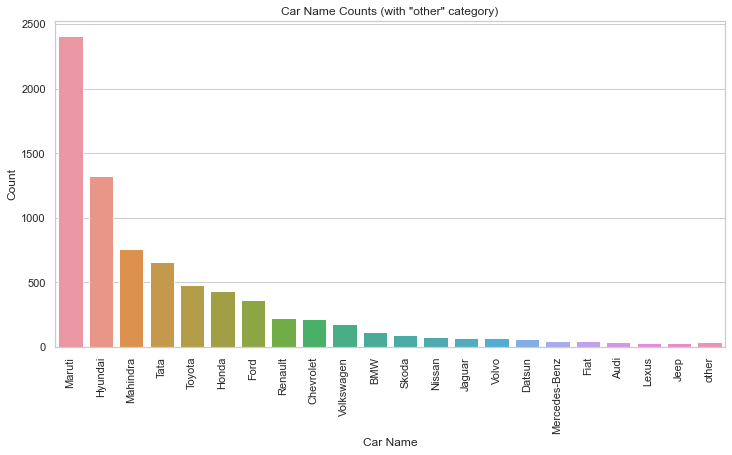

In [199]:
# . Créez un graphique à barres pour la colonne 'name' mise à jour.
plt.figure(figsize=(12, 6))
plot = sns.barplot(x=name_counts.index, y=name_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Car Name Counts (with "other" category)')
plt.show()


In [200]:
data.sample(10)

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
1380,Ford,2017.0,850000.0,63982.0,Diesel,Manual,First Owner,22.70,1498.0,89.84,5.0
1181,Mahindra,2015.0,1050000.0,90000.0,Diesel,Manual,First Owner,15.40,2179.0,120.00,7.0
4273,Volvo,2018.0,2475000.0,2000.0,Diesel,Automatic,First Owner,16.80,1984.0,150.00,5.0
2008,Volkswagen,2014.0,425000.0,80000.0,Diesel,Manual,Second Owner,15.11,1598.0,103.60,5.0
2089,Mahindra,2016.0,650000.0,100000.0,Diesel,Manual,First Owner,18.49,1493.0,100.00,7.0
3125,Maruti,2007.0,150000.0,75000.0,Petrol,Manual,First Owner,19.70,796.0,46.30,5.0
5245,Audi,2018.0,3975000.0,31800.0,Diesel,Automatic,First Owner,17.01,1968.0,188.00,5.0
2064,Mahindra,2012.0,550000.0,130000.0,Diesel,Manual,First Owner,15.10,2179.0,140.00,7.0
6647,Maruti,2016.0,375000.0,120000.0,Petrol,Manual,First Owner,15.37,1196.0,73.00,5.0
5256,Mercedes-Benz,2019.0,5200000.0,17000.0,Petrol,Automatic,First Owner,15.00,1991.0,194.40,5.0


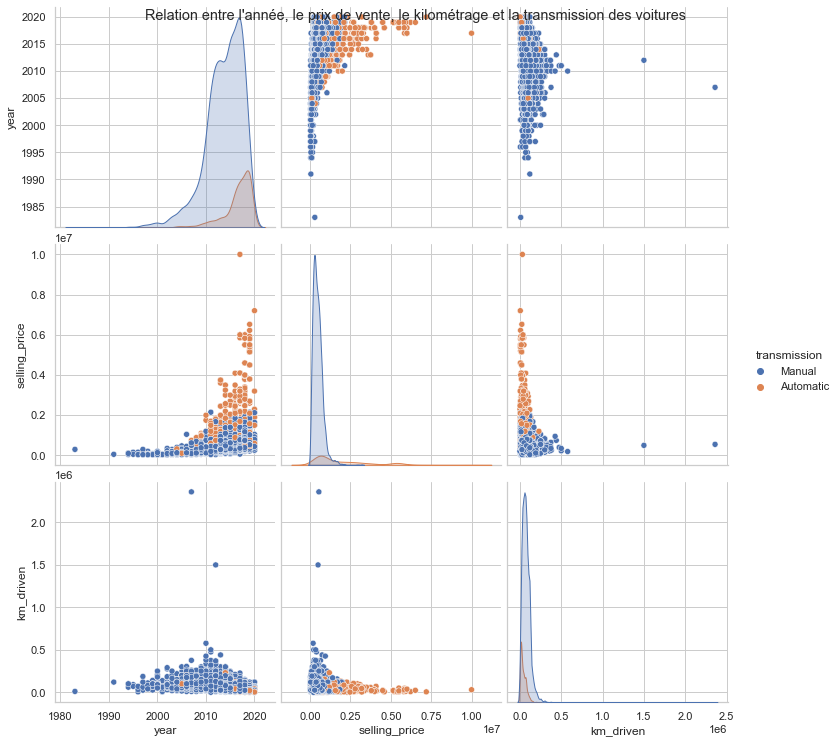

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes à inclure dans la pairplot
columns_to_include = ['year', 'selling_price', 'km_driven', 'transmission']

# Création d'une palette de couleurs personnalisée

# Utilisation du style de base de seaborn pour une apparence plus esthétique
sns.set(style='whitegrid')

# Création de la pairplot avec la palette de couleurs personnalisée
pairplot = sns.pairplot(data[columns_to_include], hue='transmission', diag_kind='kde', kind='scatter', height=3.5)

# Titre de la pairplot
plt.suptitle("Relation entre l'année, le prix de vente, le kilométrage et la transmission des voitures")

# Affichage de la pairplot
plt.show()


Commentaires sur les observations

Le prix des voitures automatiques est généralement plus élevé que celui des voitures manuelles.
On peut observer que le nombre de voitures automatiques a augmenté au cours des dernières années, en particulier entre 2015 et 2020.

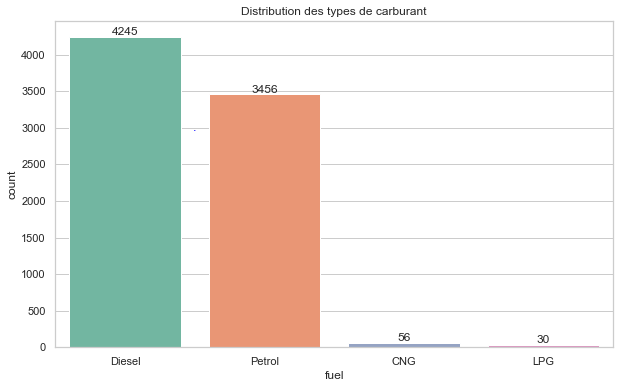

In [202]:
# Création d'une palette de couleurs personnalisée
custom_palette = sns.color_palette("Set2")  # Vous pouvez choisir une palette qui vous convient

# Création d'un graphique à barres pour la colonne 'fuel'
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='fuel', data=data, palette=custom_palette)

# Titre du graphique
plt.title("Distribution des types de carburant")

# Affichage des étiquettes de comptage au-dessus des barres
for p in plot.patches:
    plot.annotate(f'{p.get_height()}',
                  (p.get_x() + p.get_width() / 2.0, p.get_height()),
                  ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Ajout de commentaires sur les observations
plt.text(0.5, 3000, ".", ha='center', va='center', fontsize=12, color='blue')

# Affichage du graphique
plt.show()



* on constate que les 2 types(diesel et pertrol) sont les plus trouvés dans les données
=> donc l'idée de renommer les autres type par 'other'

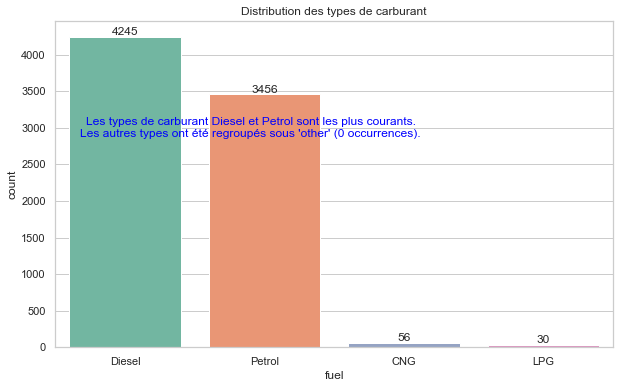

In [203]:
# Création d'une palette de couleurs personnalisée
custom_palette = sns.color_palette("Set2")  # Vous pouvez choisir une palette qui vous convient

# Compter les occurrences de chaque type de carburant
fuel_counts = data['fuel'].value_counts()

# Définir un seuil pour regrouper les types moins fréquents en 'other'
threshold = 15
other_fuel_count = fuel_counts[fuel_counts < threshold].sum()

# Remplacer les types de carburant moins fréquents par 'other' dans le dataframe
data['fuel'] = data['fuel'].apply(lambda x: 'other' if fuel_counts[x] < threshold else x)

# Création d'un graphique à barres pour la colonne 'fuel'
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='fuel', data=data, palette=custom_palette)

# Titre du graphique
plt.title("Distribution des types de carburant")

# Affichage des étiquettes de comptage au-dessus des barres
for p in plot.patches:
    plot.annotate(f'{p.get_height()}',
                  (p.get_x() + p.get_width() / 2.0, p.get_height()),
                  ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Commentaires plus détaillés sur les observations
plt.text(0.9, 3000, f"Les types de carburant Diesel et Petrol sont les plus courants.\n"
                     f"Les autres types ont été regroupés sous 'other' ({other_fuel_count} occurrences).",
         ha='center', va='center', fontsize=12, color='blue')

# Affichage du graphique
plt.show()


In [204]:
manuel = data[data['transmission']=='Manual']
automatique = data[data['transmission']=='Automatic']

<Figure size 864x576 with 0 Axes>

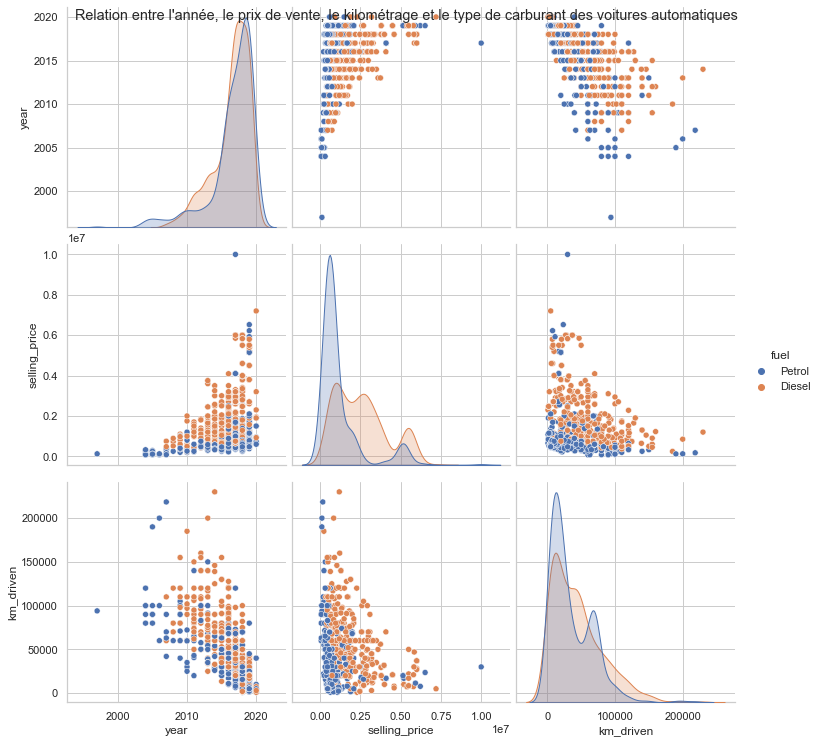

In [205]:
# Sélection des colonnes à inclure dans la pairplot
columns_to_include = ['year', 'selling_price', 'km_driven', 'fuel']

# Filtrage des données pour les voitures automatiques
automatique = data[data['transmission'] == 'Automatic']

# Création d'une palette de couleurs personnalisée
custom_palette = sns.color_palette("husl")  # Vous pouvez choisir une palette qui vous convient

# Création de la pairplot pour les voitures automatiques en fonction du type de carburant
plt.figure(figsize=(12, 8))
pairplot = sns.pairplot(automatique[columns_to_include], hue='fuel', diag_kind='kde', kind='scatter',height=3.5)

# Titre de la pairplot
plt.suptitle("Relation entre l'année, le prix de vente, le kilométrage et le type de carburant des voitures automatiques")

# Affichage de la pairplot
plt.show()



### a. Owner Type

<Axes: xlabel='owner', ylabel='selling_price'>

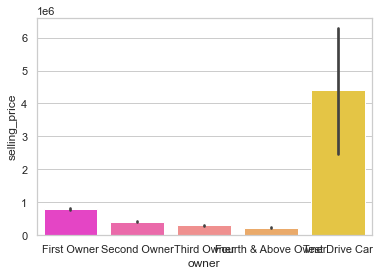

In [206]:
sns.barplot(x='owner',y='selling_price',data=data,palette='spring')

Nous avons identifié un problème dans notre ensemble de données : la présence de 5 voitures classées comme "voitures d'essai" (Test Drive Car). Pour maintenir la qualité et la cohérence de nos données, il est judicieux de les supprimer de notre dataset. De plus, nous avons observé que la majorité des véhicules appartiennent aux catégories "First Owner" et "Second Owner", tandis que les autres catégories d'anciens propriétaires sont moins fréquentes. Par conséquent, pour simplifier notre analyse, nous avons regroupé tous les autres types d'anciens propriétaires en une seule catégorie que nous avons appelée "Third Owner & Above". Cette démarche nous permet de mieux comprendre la distribution des propriétaires et de rendre nos données plus faciles à interpréter.

<Axes: xlabel='owner', ylabel='selling_price'>

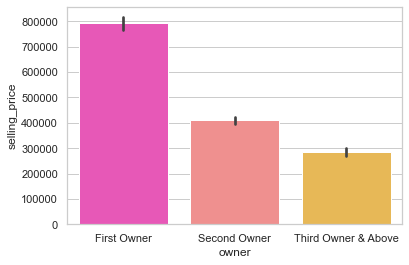

In [207]:
# Supprimer les entrées correspondant aux "voitures d'essai" (test Driver Car)
data = data[~(data['owner'] == 'Test Drive Car')]

# Regrouper tous les autres types d'anciens propriétaires en "Third Owner & Above"
data['owner'] = data['owner'].apply(lambda x: x if x in ['First Owner', 'Second Owner'] else 'Third Owner & Above')

# Afficher un graphique à barres pour la colonne 'owner' mise à jour
sns.barplot(x='owner',y='selling_price',data=data,palette='spring')


### b.  **Year & Km_driven**

* But : Analyser la moyenne des kilomètres parcourus chaque année et examiner la distribution des kilomètres parcourus pour les voitures manuelles et automatiques.
* Objectif : Identifier les tendances générales et détecter les outliers pour une meilleure compréhension des données.

In [208]:
# Calcul de la moyenne des kilomètres parcourus chaque année
km_mean = data.groupby('year')['km_driven'].mean()

In [209]:
# Filtrage des données pour les voitures manuelles et automatiques
manual = data[data['transmission'] == 'Manual']
automatic = data[data['transmission'] == 'Automatic']

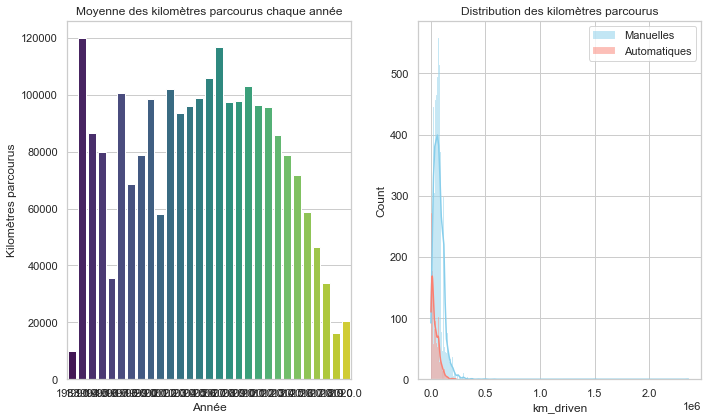

In [210]:
# Création d'une figure avec deux sous-graphiques
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Sous-graphique 1 : Barres pour la moyenne des kilomètres parcourus chaque année
sns.barplot(x=km_mean.index, y=km_mean, ax=ax[0], palette='viridis')
ax[0].set_title('Moyenne des kilomètres parcourus chaque année')
ax[0].set_xlabel('Année')
ax[0].set_ylabel('Kilomètres parcourus')

# Sous-graphique 2 : Distribution des kilomètres parcourus pour les voitures manuelles et automatiques
sns.histplot(data=manual, x='km_driven', label='Manuelles', kde=True, ax=ax[1], color='skyblue')
sns.histplot(data=automatic, x='km_driven', label='Automatiques', kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribution des kilomètres parcourus')
ax[1].legend()

# Ajustements visuels
plt.tight_layout()

# Affichage du graphique
plt.show()


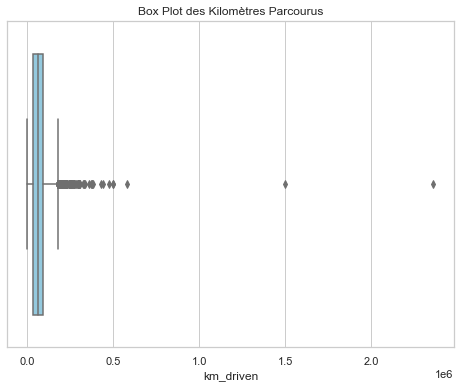

In [211]:
# Créer un box plot pour la colonne 'km_driven'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['km_driven'], color='skyblue')

# Titre du graphique
plt.title('Box Plot des Kilomètres Parcourus')

# Affichage du graphique
plt.show()


=> Commentaires sur les observations
* Nous pouvons voir que la moyenne des kilomètres parcourus augmente de 1995 à 2005, puis diminue de manière linéaire jusqu'en 2020.
* Le graphique de distribution révèle la présence d'outliers que nous devrions examiner et éventuellement supprimer pour une analyse plus précise.


### c. **Year and Selling Price**

* But : Analyser la moyenne du prix de vente des voitures manuelles et automatiques chaque année.
* Objectif : Identifier les tendances de prix pour les deux types de transmission au fil des années.

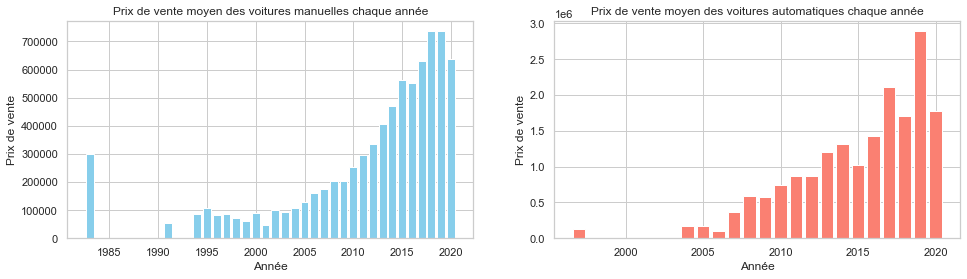

In [212]:
# Calcul de la moyenne du prix de vente pour les voitures manuelles chaque année
year_mean_manual = data[data['transmission'] == 'Manual'].groupby('year')['selling_price'].mean()

# Calcul de la moyenne du prix de vente pour les voitures automatiques chaque année
year_mean_automatic = data[data['transmission'] == 'Automatic'].groupby('year')['selling_price'].mean()

# Création d'une figure avec deux sous-graphiques
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Sous-graphique 1 : Barres pour la moyenne du prix de vente des voitures manuelles chaque année
ax[0].bar(year_mean_manual.index, year_mean_manual, color='skyblue')
ax[0].set_title('Prix de vente moyen des voitures manuelles chaque année')
ax[0].set_xlabel('Année')
ax[0].set_ylabel('Prix de vente')

# Sous-graphique 2 : Barres pour la moyenne du prix de vente des voitures automatiques chaque année
ax[1].bar(year_mean_automatic.index, year_mean_automatic, color='salmon')
ax[1].set_title('Prix de vente moyen des voitures automatiques chaque année')
ax[1].set_xlabel('Année')
ax[1].set_ylabel('Prix de vente')

# Affichage du graphique
plt.show()


=> Commentaires sur les observations
*  Nous pouvons voir que le prix de vente des voitures manuelles augmente de manière linéaire chaque année.
* Pour les voitures automatiques, bien qu'il y ait des fluctuations annuelles, nous pouvons clairement observer une tendance à la hausse globale du prix de vente au fil des années.


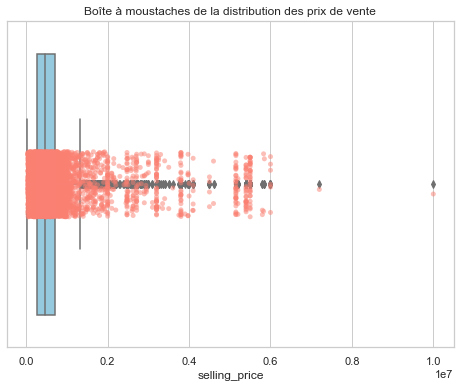

In [213]:
# But : Identifier et présenter les outliers dans la distribution des prix de vente.
# Objectif : Analyser les valeurs aberrantes pour comprendre leur impact sur les données.

# Créer un box plot pour la distribution des prix de vente
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['selling_price'], color='skyblue')

# Titre du graphique
plt.title('Boîte à moustaches de la distribution des prix de vente')

# Afficher les outliers en utilisant des points
sns.stripplot(x=data['selling_price'], color='salmon', alpha=0.5)

# Affichage du graphique
plt.show()



### Commentaires sur les observations
* Nous avons créé un graphique en boîte (box plot) pour la distribution des prix de vente.
* Les points rouges représentent les outliers, c'est-à-dire les valeurs qui sont considérablement différentes de la majorité des données.
* L'analyse des outliers peut fournir des informations précieuses sur les données et leur qualité.

# Supprimer les outliers

**Supprimer les outliers de la colonne 'km_driven' en fonction de la transmission**

* But : Identifier et supprimer les outliers de la colonne 'km_driven' en fonction de la transmission.
* Objectif : Améliorer la qualité des données en éliminant les valeurs aberrantes.

In [214]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_cleaned

# Supprimer les outliers du prix de vente (selling_price)
data = remove_outliers_iqr(data, 'selling_price')

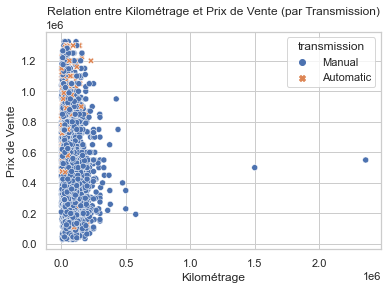

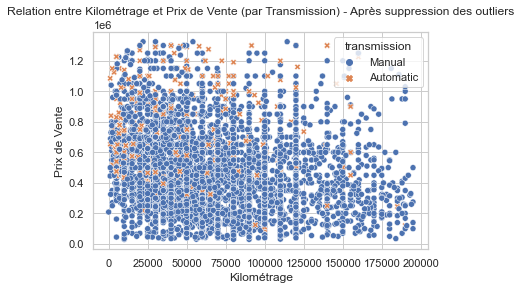

In [215]:
# Affichage d'un scatter plot pour visualiser la relation entre 'km_driven' et 'selling_price' en fonction de la transmission
sns.scatterplot(data=data, x="km_driven", y="selling_price", hue='transmission', style='transmission')
plt.title('Relation entre Kilométrage et Prix de Vente (par Transmission)')
plt.xlabel('Kilométrage')
plt.ylabel('Prix de Vente')
plt.show()

# Définition d'une fonction pour supprimer les outliers de 'km_driven'
def remove_outlier_km_driven(data):
    temp = pd.DataFrame()

    data_km_driven = data['km_driven']
    Q1 = data_km_driven.quantile(0.25)
    Q3 = data_km_driven.quantile(0.75)
    IQR = Q3 - Q1

    # Filtrage des outliers
    data_outlier = data_km_driven[(data_km_driven < (Q1 - 1.5 * IQR)) | (data_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp, data_outlier])

    return data.drop(temp.index)

# Suppression des outliers de 'km_driven'
data = remove_outlier_km_driven(data)

# Affichage d'un scatter plot mis à jour pour visualiser la relation après la suppression des outliers
sns.scatterplot(data=data, x="km_driven", y="selling_price", hue='transmission', style='transmission')
plt.title('Relation entre Kilométrage et Prix de Vente (par Transmission) - Après suppression des outliers')
plt.xlabel('Kilométrage')
plt.ylabel('Prix de Vente')
plt.show()


# La suppression des outliers a permis d'améliorer la qualité des données et de rendre la relation entre le kilométrage et le prix de vente plus claire dans le scatter plot.


**Supprimer les outliers de la colonne 'selling_price' en fonction de l'année et de la transmission**

* But : Identifier et supprimer les outliers du prix de vente ('selling_price') en fonction de l'année et de la transmission.
* Objectif : Améliorer la qualité des données en éliminant les valeurs aberrantes spécifiques à chaque année et à chaque transmission.

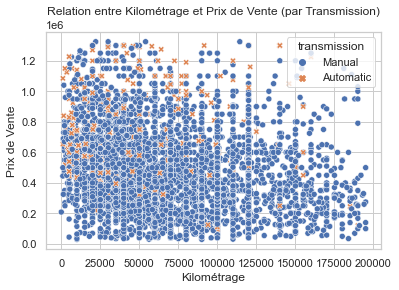

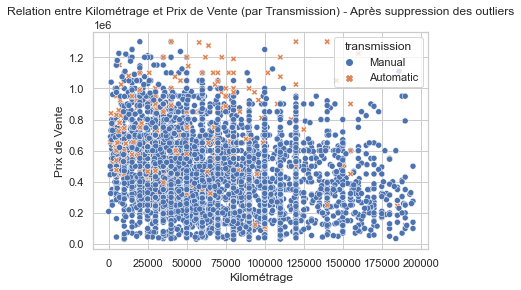

In [216]:
# Affichage d'un scatter plot pour visualiser la relation entre 'km_driven' et 'selling_price' en fonction de la transmission
sns.scatterplot(data=data, x="km_driven", y="selling_price", hue='transmission', style='transmission')
plt.title('Relation entre Kilométrage et Prix de Vente (par Transmission)')
plt.xlabel('Kilométrage')
plt.ylabel('Prix de Vente')
plt.show()

# Définition d'une fonction pour supprimer les outliers de 'selling_price' en fonction de l'année et de la transmission
def remove_outlier_selling_price(data):
    temp = pd.DataFrame()

    for year in sorted(data.year.unique()):
        for transmission in ['Manual', 'Automatic']:
            year_transmission_data = data[(data['year'] == year) & (data['transmission'] == transmission)]
            year_transmission_price = year_transmission_data['selling_price']

            Q1 = year_transmission_price.quantile(0.25)
            Q3 = year_transmission_price.quantile(0.75)
            IQR = Q3 - Q1

            # Filtrage des outliers spécifiques à chaque année et à chaque transmission
            outlier_data = year_transmission_data[(year_transmission_price < (Q1 - 1.5 * IQR)) | (year_transmission_price > (Q3 + 1.5 * IQR))]
            temp = pd.concat([temp, outlier_data])

    return data.drop(temp.index)

# Suppression des outliers de 'selling_price' en fonction de l'année et de la transmission
data = remove_outlier_selling_price(data)

# Affichage d'un scatter plot mis à jour pour visualiser la relation après la suppression des outliers
sns.scatterplot(data=data, x="km_driven", y="selling_price", hue='transmission', style='transmission')
plt.title('Relation entre Kilométrage et Prix de Vente (par Transmission) - Après suppression des outliers')
plt.xlabel('Kilométrage')
plt.ylabel('Prix de Vente')
plt.show()


 =>  La suppression des outliers spécifiques à chaque année et à chaque transmission a permis d'améliorer la qualité des données et de rendre la relation entre le kilométrage et le prix de vente plus claire dans le scatter plot.

### d. **Year**

* But : Analyser le prix de vente moyen des voitures manuelles et automatiques chaque année.
* Objectif : Identifier les tendances de prix au fil des années tout en excluant les données antérieures à 2005.

In [217]:
def remove_outliers_iqr_by_year(data, column):
    temp = pd.DataFrame()

    for year in sorted(data['year'].unique()):
        year_data = data[data['year'] == year]
        year_values = year_data[column]

        Q1 = year_values.quantile(0.25)
        Q3 = year_values.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = year_data[(year_values < lower_bound) | (year_values > upper_bound)]
        temp = pd.concat([temp, outliers])

    return data.drop(temp.index)

# Supprimer les outliers du prix de vente (selling_price) en fonction de l'année
data = remove_outliers_iqr_by_year(data, 'selling_price')

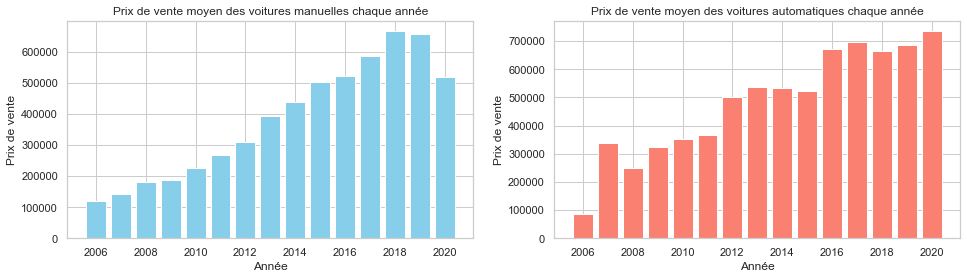

In [218]:
# Créer un sous-ensemble de données en excluant les années antérieures à 2005
data = data[data['year'] > 2005]

# Calcul du prix de vente moyen des voitures manuelles chaque année
year_mean_manual = data[data['transmission'] == 'Manual'].groupby('year')['selling_price'].mean()

# Calcul du prix de vente moyen des voitures automatiques chaque année
year_mean_automatic = data[data['transmission'] == 'Automatic'].groupby('year')['selling_price'].mean()

# Création de deux sous-graphiques pour afficher les moyennes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Sous-graphique 1 : Barres pour la moyenne du prix de vente des voitures manuelles chaque année
ax[0].bar(year_mean_manual.index, year_mean_manual, color='skyblue')
ax[0].set_title('Prix de vente moyen des voitures manuelles chaque année')
ax[0].set_xlabel('Année')
ax[0].set_ylabel('Prix de vente')

# Sous-graphique 2 : Barres pour la moyenne du prix de vente des voitures automatiques chaque année
ax[1].bar(year_mean_automatic.index, year_mean_automatic, color='salmon')
ax[1].set_title('Prix de vente moyen des voitures automatiques chaque année')
ax[1].set_xlabel('Année')
ax[1].set_ylabel('Prix de vente')

# Affichage du graphique
plt.show()


=>  En excluant les données antérieures à 2005, nous pouvons voir les tendances de prix de manière plus claire.
* Le prix de vente moyen des voitures manuelles et automatiques peut être observé pour chaque année.

# 4.verification

In [219]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014.0,450000.0,145500.0,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014.0,370000.0,120000.0,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
3,Hyundai,2010.0,225000.0,127000.0,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
5,Hyundai,2017.0,440000.0,45000.0,Petrol,Manual,First Owner,20.14,1197.0,81.86,5.0
8,Toyota,2011.0,350000.0,90000.0,Diesel,Manual,First Owner,23.59,1364.0,67.10,5.0


In [220]:
data.drop(['mileage','seats'],axis=1,inplace=True) # D'apres le matrice corr

In [221]:
data.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner & Above'], dtype=object)

# 5. Transformer des données d'objet en données entières

In [223]:
#Transforming data from string to integer

data.replace('Manual',2, inplace = True)
data.replace('Automatic',1, inplace = True)

data.replace('First Owner',0, inplace = True)
data.replace('Second Owner',1, inplace = True)
data.replace('Third Owner & Above',2, inplace = True)

#Changing types
data['transmission'] = data['transmission'].astype(int)
data.drop(columns=['name'], axis=1, inplace = True)

data = pd.get_dummies(data,drop_first=True)





In [224]:
data

,year,selling_price,km_driven,transmission,owner,engine,max_power,fuel_2,fuel_3,fuel_LPG
0,2014.0,450000.0,145500.0,2,0,1248.0,74.00,1,0,0
1,2014.0,370000.0,120000.0,2,1,1498.0,103.52,1,0,0
3,2010.0,225000.0,127000.0,2,0,1396.0,90.00,1,0,0
5,2017.0,440000.0,45000.0,2,0,1197.0,81.86,0,1,0
8,2011.0,350000.0,90000.0,2,0,1364.0,67.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...
8122,2014.0,475000.0,80000.0,2,1,1396.0,88.73,1,0,0
8123,2013.0,320000.0,110000.0,2,0,1197.0,82.85,0,1,0
8125,2009.0,382000.0,120000.0,2,0,1248.0,73.90,1,0,0
8126,2013.0,290000.0,25000.0,2,0,1396.0,70.00,1,0,0


# 6. Enregistrer 

In [225]:
data.to_csv('data_cleaned.csv',index=False)

<h2 style="text-align:right;">Passer à l'étape 3 ...</h2>